# Example 3.3: Softmax classification of Iris dataset

In [1]:
import torch
from torch import nn

import numpy as np
import matplotlib.pylab as plt

from sklearn import datasets

## Set the parameters

In [2]:
no_epochs = 2500
lr = 0.5

SEED = 100
np.random.seed(SEED)
torch.manual_seed(SEED)

## Read and prepare Iris data

In [3]:
no_inputs = 4
no_outputs = 3

# input data
iris = datasets.load_iris()
iris.data -= np.mean(iris.data, axis=0)

no_data = len(iris.data)

X = iris.data

# convert the targets into one-hot matrix
Y = np.zeros((no_data, no_outputs))
for i in range(no_data):
    Y[i, iris.target[i]] = 1
    
print(np.shape(X))
print(np.shape(Y))

(150, 4)
(150, 3)


## Define a class for a softmax layer

In [4]:
class SoftmaxLayer(nn.Module):
  def __init__(self, no_inputs, no_outputs):
        super().__init__()
        self.softmax_layer = nn.Sequential(
            nn.Linear(no_inputs, no_outputs),
            nn.Softmax(dim=1)
        )

  def forward(self, x):
        logits = self.softmax_layer(x)
        return logits

In [5]:
model = SoftmaxLayer(no_inputs, no_outputs)

print(f"Model structure: {model}\n\n")

for name, param in model.named_parameters():
    print(f"Layer: {name} | Size: {param.size()} | Values : {param} \n")

Model structure: SoftmaxLayer(
  (softmax_layer): Sequential(
    (0): Linear(in_features=4, out_features=3, bias=True)
    (1): Softmax(dim=1)
  )
)


Layer: softmax_layer.0.weight | Size: torch.Size([3, 4]) | Values : Parameter containing:
tensor([[-0.3883,  0.3158, -0.2374, -0.0161],
        [ 0.1765,  0.2539, -0.2373, -0.4572],
        [-0.2920, -0.3820, -0.3783,  0.2356]], requires_grad=True) 

Layer: softmax_layer.0.bias | Size: torch.Size([3]) | Values : Parameter containing:
tensor([ 0.2118,  0.2876, -0.0817], requires_grad=True) 



In [6]:
loss_fn = torch.nn.CrossEntropyLoss()
optimizer = torch.optim.SGD(model.parameters(), lr=lr)

In [7]:

loss_ = []
acc_ = []
for epoch in range(no_epochs):
    # Compute prediction and loss
    pred = model(torch.tensor(X, dtype=torch.float))
    loss = loss_fn(pred, torch.tensor(Y, dtype=torch.float))
    acc = (pred.argmax(1) == torch.tensor(Y, dtype=torch.float).argmax(1)).type(torch.float).mean()
    
    # Backpropagation
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()
    
    acc_.append(acc.item())
    loss_.append(loss.item())
    
    
    if epoch%100 == 99:
        print('Epoch %4d:  loss=%2.5f, accuracy=%2.5f'%(epoch+1, loss_[-1], acc_[-1]))


Epoch  100:  loss=0.67735, accuracy=0.95333
Epoch  200:  loss=0.64270, accuracy=0.96667
Epoch  300:  loss=0.62661, accuracy=0.96667
Epoch  400:  loss=0.61694, accuracy=0.97333
Epoch  500:  loss=0.61040, accuracy=0.98000
Epoch  600:  loss=0.60567, accuracy=0.98000
Epoch  700:  loss=0.60206, accuracy=0.98000
Epoch  800:  loss=0.59920, accuracy=0.98000
Epoch  900:  loss=0.59688, accuracy=0.98000
Epoch 1000:  loss=0.59496, accuracy=0.98000
Epoch 1100:  loss=0.59332, accuracy=0.98000
Epoch 1200:  loss=0.59193, accuracy=0.98000
Epoch 1300:  loss=0.59071, accuracy=0.98667
Epoch 1400:  loss=0.58964, accuracy=0.98667
Epoch 1500:  loss=0.58870, accuracy=0.98667
Epoch 1600:  loss=0.58785, accuracy=0.98667
Epoch 1700:  loss=0.58709, accuracy=0.98667
Epoch 1800:  loss=0.58641, accuracy=0.98667
Epoch 1900:  loss=0.58578, accuracy=0.98667
Epoch 2000:  loss=0.58521, accuracy=0.98667
Epoch 2100:  loss=0.58469, accuracy=0.98667
Epoch 2200:  loss=0.58420, accuracy=0.98667
Epoch 2300:  loss=0.58376, accur

In [8]:
w = model.state_dict()['softmax_layer.0.weight'].numpy()
b = model.state_dict()['softmax_layer.0.bias'].numpy()

print('weight = {}, \nbias = {}'.format(w, b))

weight = [[-0.8810901   2.4045556  -4.949615   -2.1128235 ]
 [ 1.2562798  -0.25736475 -0.7259602  -2.5546985 ]
 [-0.8789959  -1.9593967   4.8225145   4.4298344 ]], 
bias = [-0.73351574  4.9940534  -3.8428957 ]


## Train the softmax layer

Text(0, 0.5, 'cross-entropy')

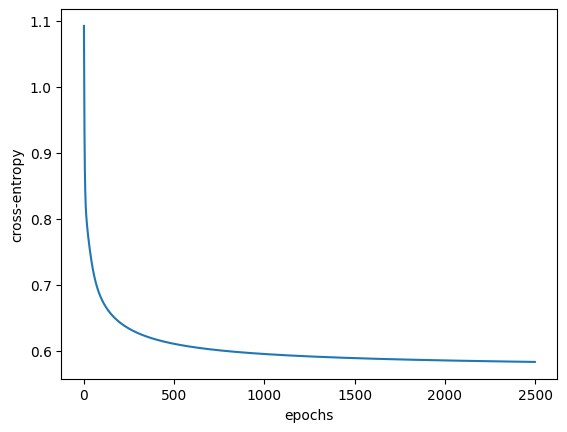

In [9]:
# plot learning curves
plt.figure(2)
plt.plot(range(no_epochs), loss_)
plt.xlabel('epochs')
plt.ylabel('cross-entropy')

Text(0, 0.5, 'classification accuracy')

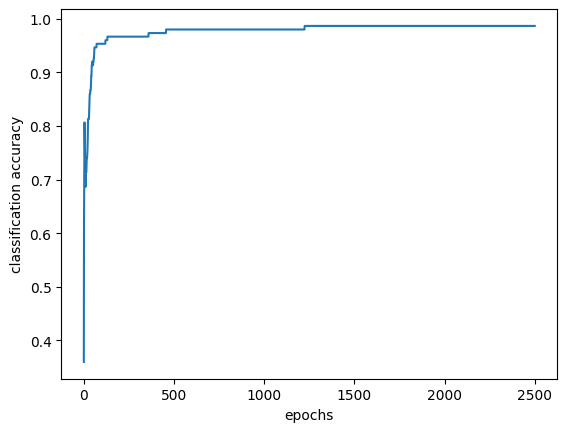

In [10]:
plt.figure(3)
plt.plot(range(no_epochs), acc_)
plt.xlabel('epochs')
plt.ylabel('classification accuracy')